### Métodos Numéricos II (2023.1 - T02)
- Aluno: Dario Filipe da Silva Costa
- Matrícula: 422156
- Email: dariocosta@alu.ufc.br

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Padrões 

# Height and width da imagem
imHeight = 5
imWidth = 9

# Parametros da suavização de Gaussiana
Gauss_KernelSize = (3, 3)
Gauss_SigmaX = 1

###**Funções**:
- cinza(Imagem): Recebe uma imagem e retorna a mesma em escala de cinza.
- pImage(src, titulo): Recebe imagem ou vetor de imagem e imprime elas na celula do notebook, com os respectivos titulo(s).

In [3]:
# Criando a imagem em escala de cinza na força bruta, pixel a pixel usando a média do RGB
def cinza(Imagem):
  (linhas, colunas) = Imagem.shape[0:2]
  Imagem_Cinza = Imagem.copy()
  
  for i in range(linhas):
      for j in range(colunas):
        Imagem_Cinza[i, j] = sum(Imagem[i, j])*0.33

  return Imagem_Cinza


#Função para exibir as imagens no notebook recebe as imagens e o titulo delas
def pImage(src, titulo):
  plt.figure(figsize=(imHeight, imWidth), dpi=200, facecolor='gray')
  if type(src) is list:
    tam = 11 + len(src)*100
    for i in range(len(src)):
      #Imagem original
      plt.subplot(tam + i)
      plt.imshow(src[i])
      plt.title(titulo[i])
      plt.xticks([]), plt.yticks([])
  else:
      plt.subplot(111)
      plt.imshow(src)
      plt.title(titulo)
      plt.xticks([]), plt.yticks([])

  plt.show()

# Algoritmo 1: Sobel

## **(1)** Suavize a imagem, aplicando um filtro Gaussiano e deixando em escala de cinza.

### Caminho da Imagem alvo

In [4]:
# Caminho da Imagem 
srcIm = '/content/ImagemAtividadeDerivadas.png' #<-------------- 

### Lendo a imagem, suavizando e colocando em escala de cinza.

In [5]:
im_original  = cv.imread(srcIm)
im_original  = cv.cvtColor(im_original,  cv.COLOR_BGR2RGB)

# Suavizando a imagem com o filtro da propria biblioteca:
im_suavizada = cv.GaussianBlur(src = im_original, ksize = Gauss_KernelSize, sigmaX = Gauss_SigmaX)

im_cinza = cinza(im_suavizada)

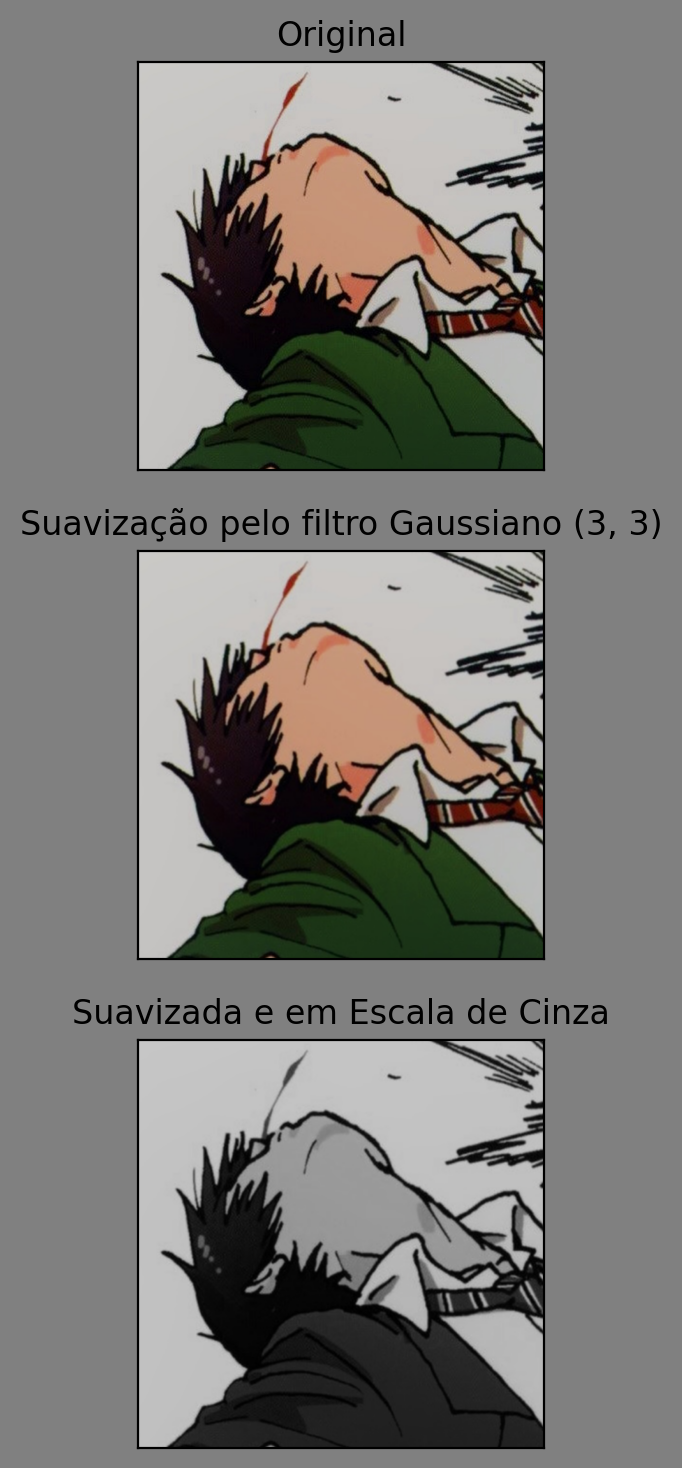

In [6]:
#Printando as 3 imagens, Original, suavizada e em escala de cinza
pImage(src = [im_original, im_suavizada, im_cinza],
       titulo= ["Original", f"Suavização pelo filtro Gaussiano {Gauss_KernelSize}"
              , 'Suavizada e em Escala de Cinza'])

## (2) Na imagem do passo 1, aplique o filtro convolucional de Gradiente 

- 2.1) um filtro de Sobel para a derivada na direção x, gerando uma imagem/matriz, A, com os valores da derivada em cada pixel/elemento da matriz;
- 2.2) um filtro de Sobel para a derivada na direção y, gerando uma imagens/matriz, B, com os valores da derivada em cada pixel/elemento da matriz;

In [7]:
#Trabalhar na matriz I como float 32 para suportar as operações
I = np.array(im_cinza.copy(), dtype=np.float32)

A = I.copy()
B = I.copy()


#Aplicando na Imagem o filtro convolucional de Gradiente

#grade da mascara - Gradiente/Sobel:
Dx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

Dy = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])

linhas , colunas = I.shape[0:2]
#  Estou ignorando as linhas da borda
for i in range(1, linhas-1):
  for j in range(1, colunas-1):

    Fx  = np.array([[I[i-1, j-1][0], I[i-1, j][0], I[i-1, j+1][0]],
                    [I[  i, j-1][0], I[  i, j][0], I[  i, j+1][0]],
                    [I[i+1, j-1][0], I[i+1, j][0], I[i+1, j+1][0]]], 
                   dtype=np.float32)
    

    pSobelx =  abs((Fx*Dx).sum()) #Direção x
    A[i, j] = [pSobelx, pSobelx,  pSobelx]

    pSobely = abs((Fx*Dy).sum()) #Direção y
    B[i, j] = [pSobely, pSobely, pSobely]


- 2.3) em cada uma das matrizes, A e B, eleve ao quadrado os valores dos elementos;
- 2.4) some as duas matrizes A e B modificadas no passo 2.3 e tire a raiz quadrada  de cada elemento dessa matriz, C.

In [8]:
C = (A**2 + B**2)**0.5


## (3) Escolha um valor (float)  para threshold e (4) gere uma matriz Final, D, com:
- pixel 0 caso o pixel correspondente da matriz C seja menor do que o threshold \\
- pixel 1. caso o pixel correspondente da matriz C seja maior do que o threshold

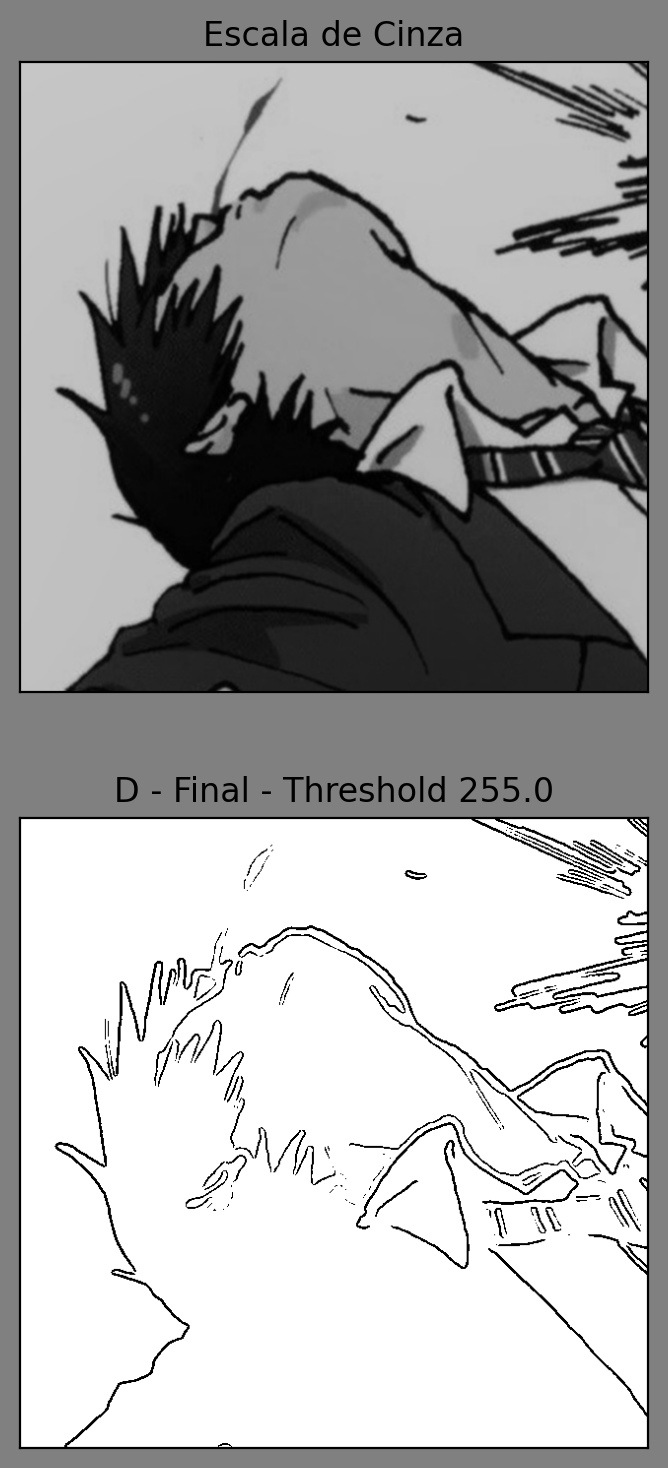

In [9]:
Threshold = 255.0 #<---- 255 só os pontos que o gradiente é maior que a propria escala uint8

D = im_cinza.copy()

linhas, colunas = C.shape[:2]

for i in range(linhas):
  for j in range(colunas):
    D[i, j] = [255, 255, 255]
    if(C[i, j][0] > Threshold):
      D[i, j] = [0, 0, 0]

pImage(
    [im_cinza, D],
    ['Escala de Cinza', f"D - Final - Threshold {Threshold}"])

# Algoritmo 2: Laplace

## 2) Na imagem do passo 1, aplique o filtro convolucional de Laplace, gerando uma imagem/matriz A


In [10]:
#Coloquei a matriz A e B como float 32 para suportar as operações
Am = I.copy()

#grade da mascara - Laplace:
Lx = np.array([[0, -1, 0],
               [-1, 4, -1],
               [0, -1, 0]])

linhas , colunas = I.shape[0:2]
#  Estou ignorando as linhas da borda
for i in range(1, linhas-1):
  for j in range(1, colunas-1):

    Fx  = np.array([[I[i-1, j-1][0], I[i-1, j][0], I[i-1, j+1][0]],
                    [I[  i, j-1][0], I[  i, j][0], I[  i, j+1][0]],
                    [I[i+1, j-1][0], I[i+1, j][0], I[i+1, j+1][0]]], 
                   dtype=np.float32)

    pLaplacex =  (Fx*Lx).sum()

    Am[i, j] = [pLaplacex, pLaplacex, pLaplacex]

## 3) Por simplicidade, gere uma imagem/matriz, B, percorrendo a imagem A e escrevendo em B
> 1 em caso o pixel correspondente da matriz A seja diferente de 0 dentro de uma tolerância (0.0001, por exemplo)

> 0 em caso o pixel correspondente da matriz A seja igual a 0 dentro de uma tolerância (0.0001, por exemplo).

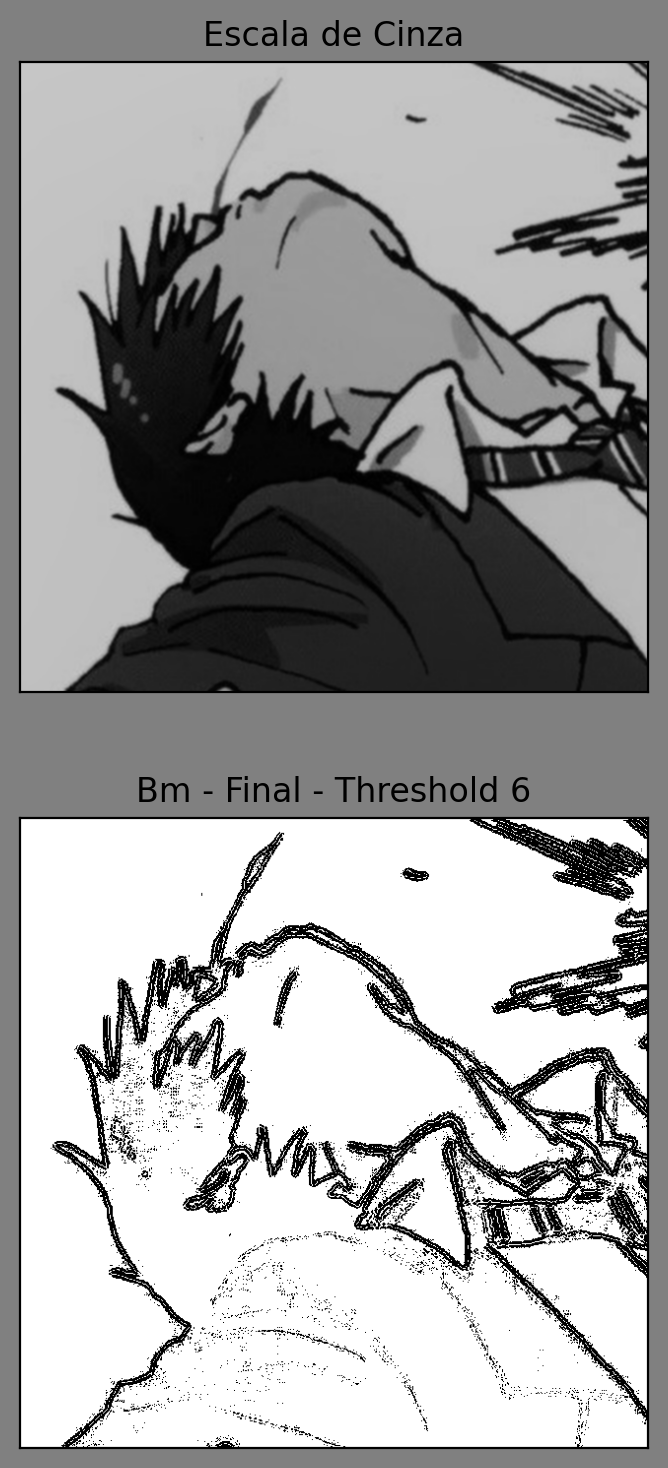

In [11]:
ThresholdL = 6

Bm = im_cinza.copy()

linhas, colunas = Am.shape[:2]

for i in range(linhas):
  for j in range(colunas):
    Bm[i, j] = [255, 255, 255]
    if(abs(Am[i, j][0]) > ThresholdL):
      Bm[i, j] = [0, 0, 0]

pImage(
    [im_cinza, Bm],
    ['Escala de Cinza', f"Bm - Final - Threshold {ThresholdL}"])

# Observações:

- Na atividade é dito que 1 para branco e 0 para preto, mas aqui a imagem está em [0, 255], então considerei 1 -> 255, ou proximo do 255, não acho que seja um problema.
- Tomei cuidado para nenhuma das matrizes de operação sejam limitadas ao uint8, todas são float32, então estão livres para serem os resultados, já que o valor da derivada e segunda derivada ultrapassam os limites do uint8.